# The Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandataiqr8125.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

 1: Agree a lot; 2: Agree a little; 3: Disagree a little; 4: Disagree a lot\
 
ASBG10A	GEN\AGREE\BEING IN SCHOOL\
ASBG10B	GEN\AGREE\SAFE AT SCHOOL\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL

 1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never
 
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\

# Literacy Test Scores

## Initial Structuring

In [4]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [5]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

In [6]:
# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [7]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [8]:
df_literacy = df[identifier_columns+averages]

In [9]:
pivot_literacy = df_literacy.pivot_table(values=averages, index=identifier_columns, aggfunc='mean')

## Literacy Heat Map

In [11]:
# Calculate the total average for each row
pivot_literacy['MeanTotal'] = pivot_literacy[averages].mean(axis=1)

In [12]:
# Define a custom order for the 'ASBH02A' column
asbh02a_sorter = ['Yes', 'No']

In [13]:
def sort_pivot_table(pivot_table, mean_col, sorter_col, sorter_order):
    """
    Sorts a pivot table based on the mean of a specified column and a custom order for another column.

    Parameters:
    - pivot_table (pd.DataFrame): The pivot table to sort.
    - mean_col (str): Column to calculate the mean for sorting countries.
    - sorter_col (str): Column to apply the custom sorting order.
    - sorter_order (list): Custom order for the sorter_col.

    Returns:
    - pd.DataFrame: A sorted pivot table.
    """
    # Sort countries by the total average of mean_col
    country_averages = (
        pivot_table.groupby('Country')[mean_col]
        .mean()
        .sort_values(ascending=False)
        .index.tolist()
    )

    # Create a custom sorting order for the index
    sorted_index = (
        pivot_table.index.to_frame()
        .rename(columns={'Country': 'Country_', sorter_col: f'{sorter_col}_'})
        .assign(
            Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
            **{f'{sorter_col}_': lambda df: pd.Categorical(df[f'{sorter_col}_'], categories=sorter_order, ordered=True)}
        )
        .sort_values(by=['Country_', f'{sorter_col}_'])
        .index
    )

    # Apply the sorted index to the pivot table
    return pivot_table.loc[sorted_index]


In [14]:
sorted_pivot_literacy = sort_pivot_table(pivot_literacy, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

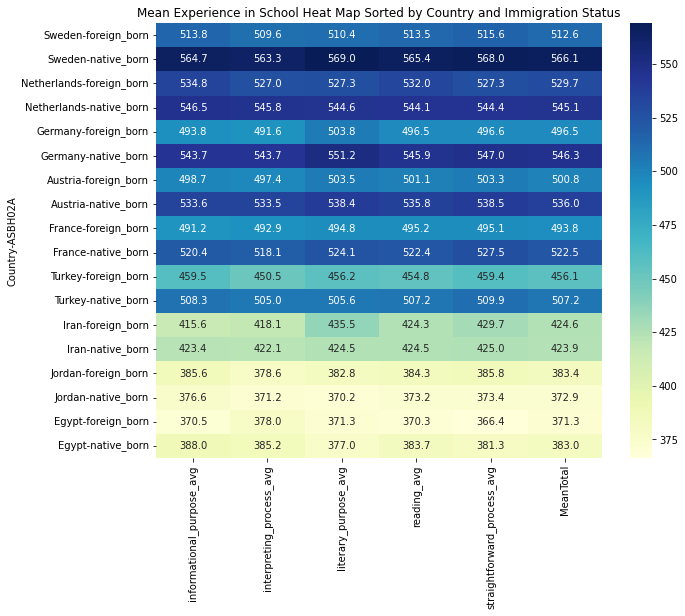

In [15]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_literacy, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

## Literacy Average Distribution

In [16]:
df["literacyavg"] = df[averages].mean(axis=1)

In [17]:
df['literacyavg_binned'] = pd.cut(df['literacyavg'], bins=10)

In [18]:
# Create a contingency table
contingency_literacy = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['literacyavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='literacyavg_binned',
        value_name='count'
    )
)

### Separated functions

In [19]:
def filter_and_prepare_data(data, filter_column, filter_value, drop_column=None):
    """
    Filters the data based on a column value and optionally drops a column.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, the column to filter on.
    - filter_value: str, the value to filter by.
    - drop_column: str, optional, a column to drop after filtering.
    
    Returns:
    - pd.DataFrame, the filtered and optionally cleaned data.
    """
    filtered_data = data[data[filter_column] == filter_value]
    if drop_column and drop_column in filtered_data.columns:
        filtered_data = filtered_data.drop(drop_column, axis=1)
    return filtered_data

In [20]:
def create_pivot_table(data, index_col, column_col, value_col):
    """
    Creates a pivot table from the filtered data.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    
    Returns:
    - pd.DataFrame, the pivot table.
    """
    return data.pivot(index=index_col, columns=column_col, values=value_col)

In [21]:
def normalize_to_percentages(pivot_table):
    """
    Normalizes pivot table values to percentages.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table with a "total" column.
    
    Returns:
    - pd.DataFrame, the pivot table normalized to percentages.
    """
    pivot_table["total"] = pivot_table.sum(axis=1)
    total_column = pivot_table["total"]
    normalized_table = pivot_table.div(total_column, axis=0) * 100
    return normalized_table.drop("total", axis=1)

In [22]:
def melt_and_format_data(pivot_table, id_col, melt_col, value_name):
    """
    Converts a pivot table to a melted format and formats categorical bins.
    
    Parameters:
    - pivot_table: pd.DataFrame, the input pivot table.
    - id_col: str, column to use as the identifier in the melted table.
    - melt_col: str, the column to melt (e.g., a column from the pivot table).
    - value_name: str, name for the values in the melted table.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the melted and formatted data.
    """
    melted = pivot_table.reset_index().melt(id_vars=id_col, var_name=melt_col, value_name=value_name)
    return melted


In [23]:
def generate_heatmap(data, filter_column, filter_value, index_col, column_col, value_col):
    """
    Generates a heatmap from the data based on filtering, pivoting, and normalizing steps.
    
    Parameters:
    - data: pd.DataFrame, the input data.
    - filter_column: str, column to filter on.
    - filter_value: str, value to filter by.
    - index_col: str, column for the pivot index.
    - column_col: str, column for the pivot columns.
    - value_col: str, column for the pivot values.
    - bin_order: list of str, ordered categories for the bins.
    
    Returns:
    - pd.DataFrame, the final heatmap as a pivot table.
    """
    filtered_data = filter_and_prepare_data(data, filter_column, filter_value, drop_column=filter_column)
    pivot_table = create_pivot_table(filtered_data, index_col=index_col, column_col=column_col, value_col=value_col)
    normalized_table = normalize_to_percentages(pivot_table)
    melted_data = melt_and_format_data(
        normalized_table, id_col=index_col, melt_col=column_col, value_name="percentage"
    )
    heatmap = melted_data.pivot(index=column_col, columns=index_col, values="percentage")
    return heatmap


In [24]:
heatmap_literacy_native_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

heatmap_literacy_foreign_born = generate_heatmap(
    data=contingency_literacy,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='literacyavg_binned',
    value_col='count',
)

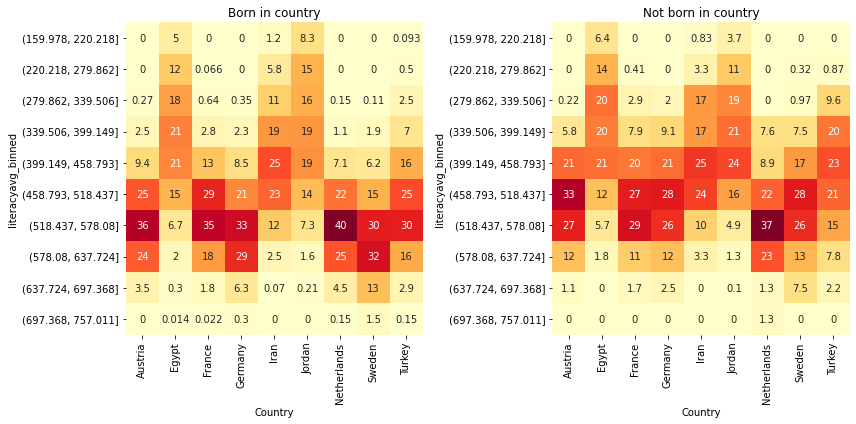

In [25]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_literacy_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_literacy_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='literacyavg_binned'>

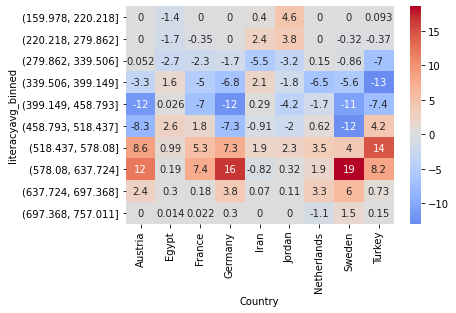

In [26]:
diff_data = heatmap_literacy_native_born - heatmap_literacy_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Literacy Minimum age of arrival

In [27]:
pivot_minage_literacy = df.pivot_table(values='literacyavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [28]:
mean_scores_literacy = (
        pivot_minage_literacy.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

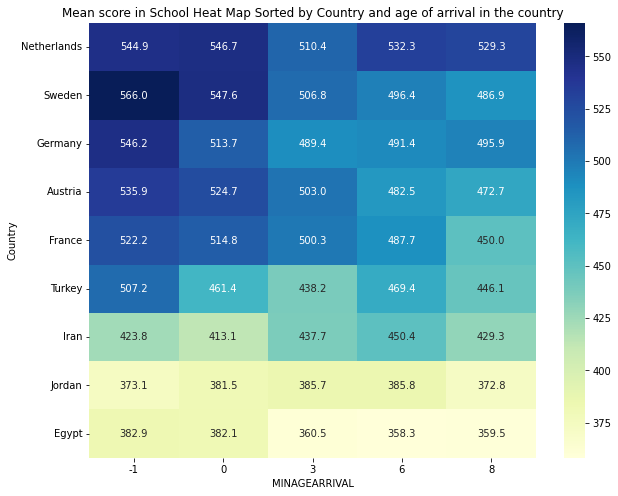

In [29]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_literacy, annot=True,fmt=".1f", cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Feelings in School

## Feelings Heat Map

In [30]:
df_feelings = df[identifier_columns+positive_feelings_in_school]

In [31]:
pivot_feelings = df_feelings.pivot_table(values=positive_feelings_in_school, index=identifier_columns, aggfunc='mean')

In [32]:
# Calculate the total average for each row
pivot_feelings['MeanTotal'] = pivot_feelings[positive_feelings_in_school].mean(axis=1)

In [34]:
def sort_pivot_table(pivot_table, mean_col, sorter_col, sorter_order):
    """
    Sorts a pivot table based on the mean of a specified column and a custom order for another column.

    Parameters:
    - pivot_table (pd.DataFrame): The pivot table to sort.
    - mean_col (str): Column to calculate the mean for sorting countries.
    - sorter_col (str): Column to apply the custom sorting order.
    - sorter_order (list): Custom order for the sorter_col.

    Returns:
    - pd.DataFrame: A sorted pivot table.
    """
    # Sort countries by the total average of mean_col
    country_averages = (
        pivot_table.groupby('Country')[mean_col]
        .mean()
        .sort_values(ascending=True)
        .index.tolist()
    )

    # Create a custom sorting order for the index
    sorted_index = (
        pivot_table.index.to_frame()
        .rename(columns={'Country': 'Country_', sorter_col: f'{sorter_col}_'})
        .assign(
            Country_=lambda df: pd.Categorical(df['Country_'], categories=country_averages, ordered=True),
            **{f'{sorter_col}_': lambda df: pd.Categorical(df[f'{sorter_col}_'], categories=sorter_order, ordered=True)}
        )
        .sort_values(by=['Country_', f'{sorter_col}_'])
        .index
    )

    # Apply the sorted index to the pivot table
    return pivot_table.loc[sorted_index]


In [35]:
sorted_pivot_feelings = sort_pivot_table(pivot_feelings, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

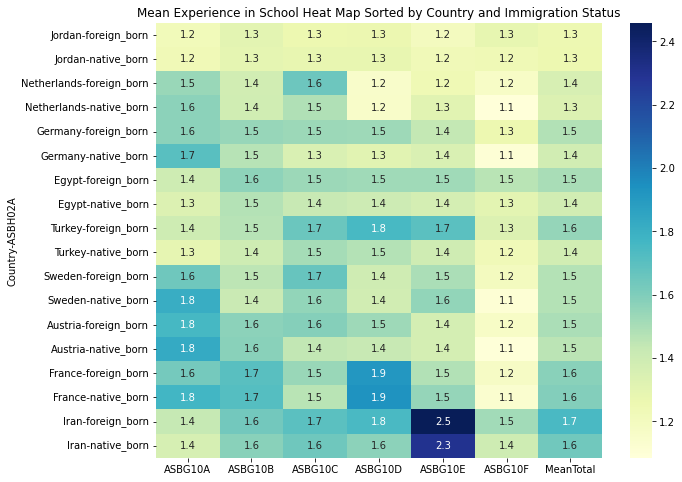

In [36]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

## Feelings Average Distribution

In [37]:
df['feelingsavg'] = df[positive_feelings_in_school].mean(axis=1)

In [38]:
df['feelingsavg_binned'] = pd.cut(df['feelingsavg'], bins=10)

In [39]:
# Create a contingency table
contingency_feelings = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['feelingsavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='feelingsavg_binned',
        value_name='count'
    )
)


In [40]:
heatmap_feelings_native_born = generate_heatmap(
    data=contingency_feelings,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='feelingsavg_binned',
    value_col='count',
)

heatmap_feelings_foreign_born = generate_heatmap(
    data=contingency_feelings,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='feelingsavg_binned',
    value_col='count',
)

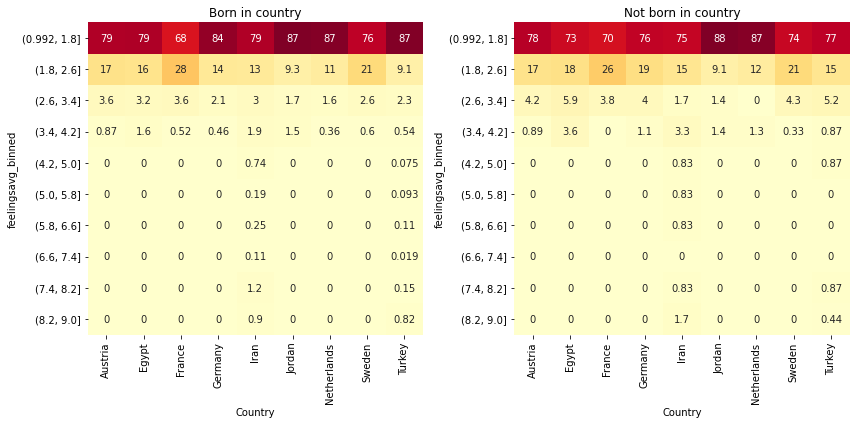

In [41]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_feelings_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_feelings_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='feelingsavg_binned'>

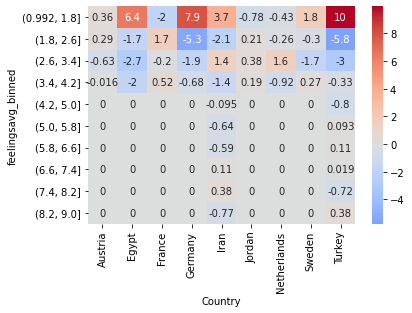

In [42]:
diff_data = heatmap_feelings_native_born - heatmap_feelings_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [43]:
pivot_minage_feelings = df.pivot_table(values='feelingsavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [44]:
mean_scores_feelings = (
        pivot_minage_feelings.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

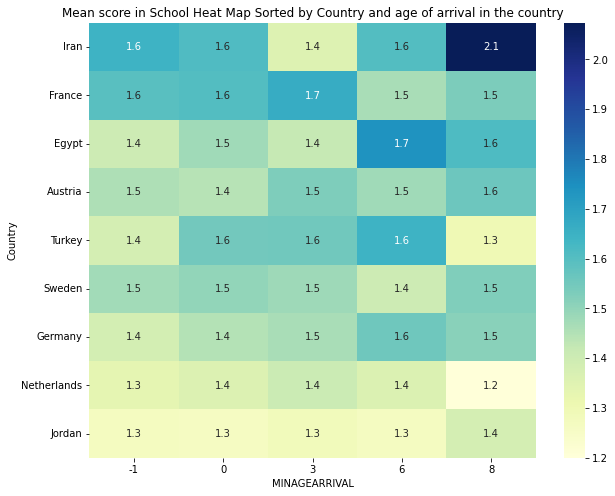

In [45]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_feelings, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

# Experience in School

## Experience in School Heatmap

In [46]:
df_experience = df[identifier_columns+negativeexperience_in_school_columns]

In [47]:
pivot_experience = df_experience.pivot_table(values=negativeexperience_in_school_columns, index=identifier_columns, aggfunc='mean')

In [48]:
# Calculate the total average for each row
pivot_experience['MeanTotal'] = pivot_experience[negativeexperience_in_school_columns].mean(axis=1)

In [49]:
sorted_pivot_experience = sort_pivot_table(pivot_experience, 'MeanTotal', 'ASBH02A', asbh02a_sorter)

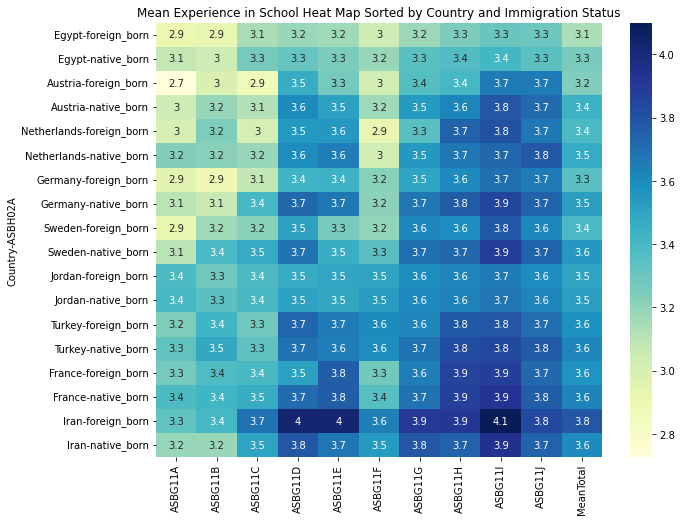

In [50]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_experience, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

 1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never
 
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\

darker colours are better

## Experience Average Distribution

In [51]:
df['experienceavg'] = df[negativeexperience_in_school_columns].mean(axis=1)

In [52]:
df['experienceavg_binned'] = pd.cut(df['experienceavg'], bins=10)

In [53]:
# Create a contingency table
contingency_experience = (
    pd.crosstab(
        index=[df['ASBH02A'], df['Country']],
        columns=df['experienceavg_binned']
    )
    .reset_index()
    .melt(
        id_vars=['ASBH02A', 'Country'],
        var_name='experienceavg_binned',
        value_name='count'
    )
)

In [54]:
heatmap_experience_native_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='native_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

heatmap_experience_foreign_born = generate_heatmap(
    data=contingency_experience,
    filter_column='ASBH02A',
    filter_value='foreign_born',
    index_col='Country',
    column_col='experienceavg_binned',
    value_col='count',
)

#### Plotting

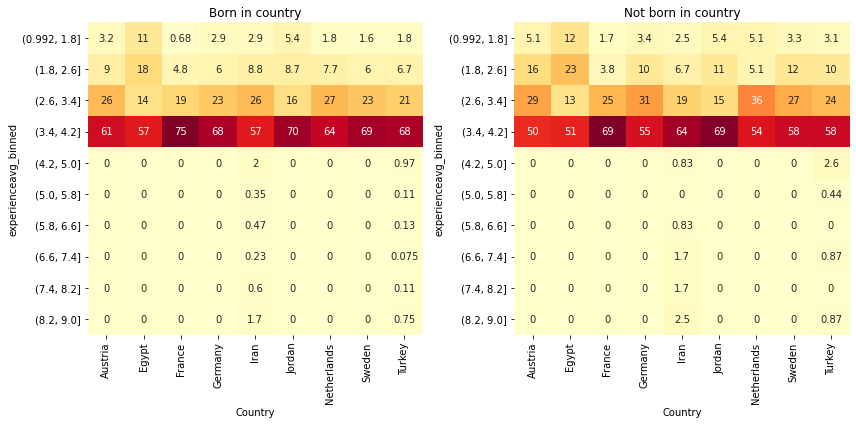

In [55]:
# Create a figure and set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmaps
sns.heatmap(heatmap_experience_native_born, ax=axes[0], cmap='YlOrRd', annot=True, cbar=False)
sns.heatmap(heatmap_experience_foreign_born, ax=axes[1], cmap='YlOrRd', annot= True, cbar=False)

# Set titles
axes[0].set_title('Born in country')
axes[1].set_title('Not born in country')

# Show the plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Country', ylabel='experienceavg_binned'>

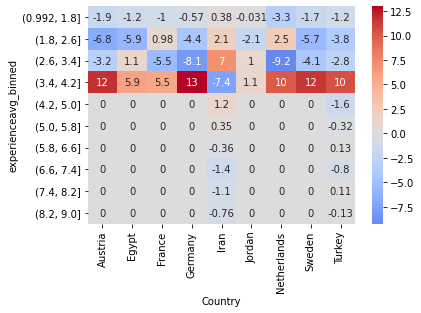

In [56]:
diff_data = heatmap_experience_native_born - heatmap_experience_foreign_born

# Plot the difference heatmap
sns.heatmap(diff_data, cmap="coolwarm", annot = True, center=0)

## Minimum age of arrival

Now I want to see how age of arrival affects average score. I need to first clean the minagearrival column - adding 'NA' for those who were born in country

In [57]:
pivot_minage_experience = df.pivot_table(values='experienceavg', index=['Country'],columns=['MINAGEARRIVAL'],dropna = False)

In [58]:
mean_scores_test = (
        pivot_minage_experience.groupby(level='Country').mean()
        .assign(MeanTotal=lambda df: df.mean(axis=1))
        .sort_values(by='MeanTotal', ascending=False).drop(columns='MeanTotal')
    )

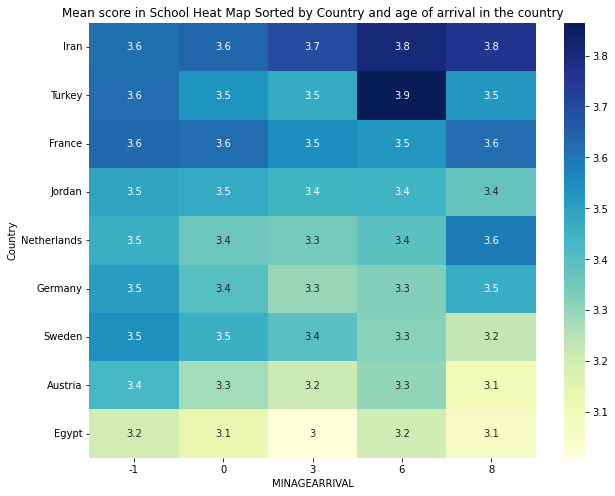

In [59]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(mean_scores_test, annot=True, cmap='YlGnBu')
plt.title('Mean score in School Heat Map Sorted by Country and age of arrival in the country')
plt.show()

Next steps - comparisons with bench marks - through line? 
Should compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant